###### Import Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import plotly.express as px
import seaborn as sns

In [45]:
%matplotlib inline

In [253]:
#!pip install factor_analyzer
#!pip install plotly.express
#!pip install wordcloud

##### Functions

In [47]:
#Below Function converts covid worry related likert scale answers into a combined % score
covidworry_cols=['worriedyourself','worriedothers','worriedphysical','worriedmental']
worrytotal=len(covidworry_cols)*5
def getCovidWorryIndex(row):
    global worrytotal
    worriedyourself=row[0]
    worriedothers=row[1]
    worriedphysical=row[2]
    worriedmental=row[3]
    #print(row)
    return round((worriedyourself+worriedothers+worriedphysical+worriedmental)/worrytotal*100,2)

In [48]:
#Below Function converts mood states/emotions related likert scale answers into a combined % score
priorworry3_cols=['priorworry','priorhappyvssad','priorenjoyactivities','priorrelaxedvsanxious',
         'priorfidget', 'priorfatigue', 'priorfocus', 'priorirritable','priorlonely', 
         'priornegthoughts']

moodtotal=len(priorworry3_cols)*5
def getMoodStateIndex(row):
    global moodtotal
    priorworry=row[0]
    priorhappyvssad=row[1]
    priorenjoyactivities=row[2]
    priorrelaxedvsanxious=row[3]
    priorfidget=row[4]
    priorfatigue=row[5]
    priorfocus=row[6]
    priorirritable=row[7]
    priorlonely=row[8]
    priornegthoughts=row[9]
    
    #Flipping scales to have the same order in all the cases i.e. positive to negative
    if priorhappyvssad==1:
        priorhappyvssad=5
    elif priorhappyvssad==2:
        priorhappyvssad=4
    elif priorhappyvssad==4:
        priorhappyvssad=2
    elif priorhappyvssad==5:
        priorhappyvssad=1
    else:
        priorhappyvssad=3
        
  
    if priorenjoyactivities==1:
        priorenjoyactivities=5
    elif priorenjoyactivities==2:
        priorenjoyactivities=4
    elif priorenjoyactivities==4:
        priorenjoyactivities=2;
    elif priorenjoyactivities==5:
        priorenjoyactivities=1
    else:
        priorenjoyactivities=3
        
    return round(((priorworry+priorhappyvssad+priorenjoyactivities+priorrelaxedvsanxious+priorfidget+priorfatigue+priorfocus+priorirritable+priorlonely+priornegthoughts)/moodtotal)*100,2)


In [49]:
#Below Function converts media use related likert scale answers into a combined % score
priormedia3_cols=['priortvmedia','priorsocialmedia','priorvideogames']
mediatotal=len(priormedia3_cols)*5
def getMediaUseIndex(row):
    global mediatotal
    priortvmedia=row[0]
    priorsocialmedia=row[1]
    priorvideogames=row[2]
    #print(row)
    return round(((priortvmedia+priorsocialmedia+priorvideogames)/mediatotal)*100,2)
 

In [50]:
#Below Function converts Substance use related likert scale answers into a combined % score
priorsubstance3_cols=['threemonthsalcohol','threemonthsvaping','threemonthstobacco','threemonthsmarijuana','threemonthsopiates',
'threemonthsother','threemonthssleepingmeds']
substancetotal=len(priorsubstance3_cols)*8
def getSubstanceUseIndex(row):
    global substancetotal
    threemonthsalcohol=row[0]
    threemonthsvaping=row[1]
    threemonthstobacco=row[2]
    threemonthsmarijuana=row[3]
    threemonthsopiates=row[4]
    threemonthsother=row[5]
    threemonthssleepingmeds=row[6]
    #print(row)
    return round(((threemonthsalcohol+threemonthsvaping+threemonthstobacco+threemonthsmarijuana+threemonthsopiates+threemonthsother+threemonthssleepingmeds)/substancetotal)*100,2)


In [51]:
#Below Function converts daily behavior related likert scale answers into a combined % score
priorbehaviour3_cols=['bedtimeweekdays','bedtimeweekends','hoursofsleepweekdays','priorhoursofsleepweekend','exerciseprior','outdoorsprior']
behaviourtotal=len(priorbehaviour3_cols)*4
def getBehaviourIndex(row):
    global behaviourtotal
    bedtimeweekdays=row[0]
    bedtimeweekends=row[1]
    hoursofsleepweekdays=row[2]
    priorhoursofsleepweekend=row[3]
    exerciseprior=row[4]
    outdoorsprior=row[5]
    #print(row)
    return round(((bedtimeweekdays+bedtimeweekends+hoursofsleepweekdays+priorhoursofsleepweekend+exerciseprior+outdoorsprior)/behaviourtotal)*100,2)
 

In [52]:
#Below Function converts life Changes related likert scale answers into a combined % score
lifechanges_stress_cols=['restrictionsstress','contactschanged','difficultydistancing','familychange','familychangestress',
                         'friendschange','friendchangestress','difficultycancellations','financedifficulty',
                         'livingdifficulty']
lifechangestresstotal=len(lifechanges_stress_cols)*5
def getLifechnageStressIndex(row):
    global lifechangestresstotal
    restrictionsstress=row[0]
    contactschanged=row[1]
    difficultydistancing=row[2]
    familychange=row[3]
    familychangestress=row[4]
    friendschange=row[5]
    friendchangestress=row[6]
    difficultycancellations=row[7]
    financedifficulty=row[8]
    livingdifficulty=row[9]
    

    #Flipping scales to have the same order in all the cases i.e. positive to negative
    if familychange==1:
        familychange=5
    elif familychange==2:
        familychange=4
    elif familychange==4:
        familychange=2
    elif familychange==5:
        familychange=1
    else:
        familychange=3
        
  
    if friendschange==1:
        friendschange=5
    elif friendschange==2:
        friendschange=4
    elif friendschange==4:
        friendschange=2
    elif friendschange==5:
        friendschange=1
    else:
        friendschange=3

    return round(((restrictionsstress+contactschanged+difficultydistancing+familychange+familychangestress+friendschange+friendchangestress+difficultycancellations+financedifficulty+livingdifficulty)/lifechangestresstotal)*100,2)


In [53]:
##Convert into classes from Mood Index
def get2WkPriorMoodStateClass(row):
    if row>=70:
        return "Extremely Stressed"
    elif row>=50 and row<70:
        return "Moderately Stressed"
    else:
        return "Normal"

In [54]:
mappind_df = pd.read_csv('updated_data/ID_Key.csv')
mappind_df.fillna("_NA_", inplace=True)
mappind_df.head()

OID  Adult_ID Parent_ID
0  08596819ef88b78ca300  78d8a910      _NA_
1  76707cf76e9c496b657f  93ea2411      _NA_
2  a1744543ec05b2008e25  0cd23e27      _NA_
3  11f743d4a8f298d8018e  f83b9799      _NA_
4  b448745d796c5b71c14e  be3c3092      _NA_

In [55]:
def isParent(row):
    if row!="_NA_":
        return "Y"
    else:
        return "N"

### April 2020 - Parent

In [56]:
parent_df = pd.read_csv('updated_data/April/CRISIS_Parent_April_2020.csv')

In [57]:
parent_df['YearMonth']="2020-04"

In [58]:
parent_df=pd.merge(parent_df,mappind_df[['Adult_ID','Parent_ID']],left_on=['ID'],right_on=['Adult_ID'],how='left')

In [59]:
parent_df.head()

ID           timestamp1  country   age  sex sex_other  \
0  00028667  2020-04-13 09:21:00    186.0  52.0  1.0       NaN   
1  003f374a  2020-04-09 18:28:00    186.0  35.0  1.0       NaN   
2  00662b3f  2020-04-15 12:18:00    186.0  32.0  2.0       NaN   
3  00991770  2020-04-09 19:07:00    186.0  30.0  1.0       NaN   
4  00b76a23  2020-04-09 17:16:00    187.0  27.0  1.0       NaN   

   raceethnicity___1  raceethnicity___2  raceethnicity___3  raceethnicity___4  \
0                  1                  0                  0                  0   
1                  1                  0                  0                  0   
2                  1                  0                  0                  0   
3                  1                  0                  0                  0   
4                  1                  0                  0                  0   

   ...  sx_ct  sx_ct3  childage_bin  schoolclosed_recode  Apr_cms_ave  \
0  ...      0       0          6-13        onlineclasses          2.1   
1  ...      0       0          6-13        closesnoclass          2.4   
2  ...      0       0       5_Under        closesnoclass          NaN   
3  ...      0       0          6-13        closesnoclass          1.7   
4  ...      0       0       5_Under        notapplicable          2.1   

   Apr_cw_ave  Apr_lc_subtype  YearMonth  Adult_ID  Parent_ID  
0    1.833333             2.0    2020-04       NaN        NaN  
1    2.500000             2.0    2020-04       NaN        NaN  
2         NaN             NaN    2020-04       NaN        NaN  
3    1.666667             1.0    2020-04       NaN        NaN  
4    1.500000             1.0    2020-04       NaN        NaN  

[5 rows x 248 columns]

In [60]:
cols=parent_df.columns
#for column in cols:
#    print(column)

- Basic Checks

In [61]:
##Remove Columns with missing values more than threshold
print(parent_df.shape)
missing_val_threshold=0.8
parent_adj_df=parent_df.dropna(thresh=parent_df.shape[0]*missing_val_threshold,how='all',axis=1)
print(parent_adj_df.shape)

#Dropped Columns
for col in parent_df.columns:
    if col not in parent_adj_df.columns:
        print(col)

(2244, 248)
(2244, 210)
sex_other
working___1
working___2
working___3
working___4
working___5
working___6
working___7
working___8
occupation
military
education
educationmother
educationfather
essentialworkerhome
covidfacility
othersymptoms
specifypositive
classesinsession
classesirl
work
goingtoworkplace
workfromhome
laidoff
losejob
disruptedsupportsother
anything_else
adult_selfreport_baseline_form_complete
othercaregiverrelation
pareduc
empstatus
empstat
hhcomp_ad
Apr_cms_ave
Apr_cw_ave
Apr_lc_subtype
Adult_ID
Parent_ID


In [62]:
#Fill Null values with "_NA_"
parent_adj_df.fillna("_NA_",inplace=True)

C:\Users\shaks\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [63]:
## Correlation Analysis
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
corr_df = parent_adj_df.select_dtypes(include=numerics)
corr_df = corr_df.apply(pd.to_numeric)
#lifechanges_df.corr().abs()
#factor_df.corr(method="pearson")
c = corr_df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so[80:100]

impact___1             impact___1               1.000000
impact___2             impact___2               1.000000
impact___3             impact___3               1.000000
impact___4             impact___4               1.000000
impact___5             impact___5               1.000000
impact___6             impact___6               1.000000
impact___7             impact___7               1.000000
impact___8             impact___8               1.000000
disruptedsupports___1  disruptedsupports___1    1.000000
disruptedsupports___2  disruptedsupports___2    1.000000
raceethnicity___4      raceethnicity___4        1.000000
sx_ct3                 sx_ct3                   1.000000
                       sx_ct                    0.977104
sx_ct                  sx_ct3                   0.977104
householdcomp___2      hhcomp                   0.885934
hhcomp                 householdcomp___2        0.885934
hhcomp_ch              householdcomp___2        0.885934
householdcomp___2      hhcomp_c

In [64]:
#Drop columns with too high correlations
# sx_ct3                sx_ct                    0.962606
#sx_ct                  sx_ct3                   0.962606
#diagnosedfamily___2    diagnosedfamily___3      0.881885
#diagnosedfamily___3    diagnosedfamily___2      0.881885

#Keeping sx_ct,  diagnosedfamily___2
parent_adj_df.drop(['sx_ct3'], axis=1, inplace=True)
parent_adj_df.drop(['diagnosedfamily___3'], axis=1, inplace=True)
print(parent_adj_df.shape)

(2244, 208)


C:\Users\shaks\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [65]:
##Add one-hot encoding for age_bin
age_bin_cols = pd.get_dummies(parent_adj_df.age, prefix='age_bin')
parent_adj_df=pd.concat([parent_adj_df,age_bin_cols],axis=1)
parent_adj_df.head()

ID           timestamp1 country   age  sex  raceethnicity___1  \
0  00028667  2020-04-13 09:21:00   186.0  52.0  1.0                  1   
1  003f374a  2020-04-09 18:28:00   186.0  35.0  1.0                  1   
2  00662b3f  2020-04-15 12:18:00   186.0  32.0  2.0                  1   
3  00991770  2020-04-09 19:07:00   186.0  30.0  1.0                  1   
4  00b76a23  2020-04-09 17:16:00   187.0  27.0  1.0                  1   

   raceethnicity___2  raceethnicity___3  raceethnicity___4  raceethnicity___5  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   ...  age_bin_56.0  age_bin_57.0  age_bin_58.0  age_bin_59.0  age_bin_60.0  \
0  ...             0             0             0             0             0   
1  ...             0             0             0             0             0   
2  ...             0             0             0             0             0   
3  ...             0             0             0             0             0   
4  ...             0             0             0             0             0   

   age_bin_61.0  age_bin_62.0  age_bin_63.0  age_bin_64.0  age_bin__NA_  
0             0             0             0             0             0  
1             0             0             0             0             0  
2             0             0             0             0             0  
3             0             0             0             0             0  
4             0             0             0             0             0  

[5 rows x 259 columns]

In [66]:
#Replace nulls with Mode
for column in parent_adj_df.columns:
    mode_val=parent_adj_df[column].mode()
    #print(column,mode_val[0])
    parent_adj_df.replace({column:{"_NA_":mode_val[0]}}, inplace=True)

In [91]:
demographic_cols=['country','sex',
#'raceethnicity___1','raceethnicity___2','raceethnicity___3','raceethnicity___4',,'age_bin_30_under'
#'raceethnicity___5','raceethnicity___6','raceethnicity___7','raceethnicity___8','age_bin_30-49',working___8','military'
#'raceethnicity___9','raceethnicity___10','raceethnicity___11','raceethnicity___12',,'working___6','educationfather'
#'raceethnicity___13','raceethnicity___14','raceethnicity___15','raceethnicity___16','educationmother',
#'raceethnicity___17','raceethnicity___18','raceethnicity___19','raceethnicity___20','hispanic','working___1','working___2',
#,'working___5' , ,'working___7','age_bin_50_over','education','working___4',,'working___3''covidfacility',,'essentialworkerhome'
'location','householdnumber',
'essentialworkers','householdcomp___1','householdcomp___2','householdcomp___3',
'householdcomp___4','householdcomp___5','householdcomp___6','householdcomp___7','roomsinhouse','insurance','govassist',
'physicalhealth','healthconditions___1','healthconditions___2','healthconditions___3','healthconditions___4',
'healthconditions___5','healthconditions___6','healthconditions___7','healthconditions___8','healthconditions___9',
'healthconditions___10','healthconditions___11','healthconditions___12','healthconditions___13','healthconditions___14',
'healthconditions___15','healthconditions___16','healthconditions___17','tall','measurementheight','weight','measurementweight',
'mentalhealth',]#occupation



In [92]:
exp_cols=['exposed___1',
'exposed___2',
'exposed___3',
'exposed___4','infected']

In [93]:
symp_cols=['symptoms___1',
'symptoms___2',
'symptoms___3',
'symptoms___4',
'symptoms___5',
'symptoms___6',
'symptoms___7',
'symptoms___8']

In [94]:
Impact_cols=['impact___1',
'impact___2',
'impact___3',
'impact___4',
'impact___5',
'impact___6',
'impact___7',
'impact___8']

In [95]:
diagnosis_cols=['diagnosedfamily___1',
'diagnosedfamily___2']


- Summary

In [96]:
parent_grouped_df = parent_adj_df[["age","sex", "country","ID"]].groupby(["country","sex", "age"]).count()
parent_grouped_df

ID
country sex age     
186.0   1.0 13.0   1
            20.0   2
            21.0   1
            23.0   1
            24.0   1
...               ..
187.0   2.0 62.0   1
            64.0   1
        3.0 43.0   1
            44.0   1
            51.0   1

[163 rows x 1 columns]

In [97]:
parent_adj_df.country.value_counts(dropna=False)

186.0    1268
187.0     976
Name: country, dtype: int64

- Covid Worries

In [98]:
covid_worry_df=parent_adj_df[covidworry_cols]
covid_worry_df['CovidWorryIndex']=covid_worry_df[covidworry_cols].apply(getCovidWorryIndex, axis=1)
print(covid_worry_df.shape)
#parent_df5.head()

(2244, 5)


<ipython-input-98-8bed66632d53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_worry_df['CovidWorryIndex']=covid_worry_df[covidworry_cols].apply(getCovidWorryIndex, axis=1)


- Mood States

In [99]:
## 3 Months Prior
covid_mood_3mon_df=parent_adj_df[priorworry3_cols]
covid_mood_3mon_df['3MonPriorMoodStateIndex']=covid_mood_3mon_df[priorworry3_cols].apply(getMoodStateIndex, axis=1)
parent_df6=pd.concat([covid_worry_df['CovidWorryIndex'],covid_mood_3mon_df['3MonPriorMoodStateIndex']],axis=1)
print(covid_worry_df.shape,parent_df6.shape)
parent_df6.head()

(2244, 5) (2244, 2)


<ipython-input-99-94d04a21685a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_mood_3mon_df['3MonPriorMoodStateIndex']=covid_mood_3mon_df[priorworry3_cols].apply(getMoodStateIndex, axis=1)


CovidWorryIndex  3MonPriorMoodStateIndex
0             30.0                     40.0
1             50.0                     34.0
2             25.0                     54.0
3             25.0                     40.0
4             20.0                     42.0

In [100]:
## 2 Weeks Prior
priorworry2_cols=['priorworry_2','priorhappyvssad_2','priorenjoyactivities_2','priorrelaxedvsanxious_2',
         'priorfidget_2', 'priorfatigue_2', 'priorfocus_2', 'priorirritable_2','priorlonely_2', 
         'priornegthoughts_2']
covid_mood_2wk_df=parent_adj_df[priorworry2_cols]
covid_mood_2wk_df['2WkPriorMoodStateIndex']=covid_mood_2wk_df[priorworry2_cols].apply(getMoodStateIndex, axis=1)
parent_df7=pd.concat([parent_df6,covid_mood_2wk_df['2WkPriorMoodStateIndex']],axis=1)
print(parent_df6.shape,parent_df7.shape)
parent_df7.head()

(2244, 2) (2244, 3)


<ipython-input-100-7b811c06c29a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_mood_2wk_df['2WkPriorMoodStateIndex']=covid_mood_2wk_df[priorworry2_cols].apply(getMoodStateIndex, axis=1)


CovidWorryIndex  3MonPriorMoodStateIndex  2WkPriorMoodStateIndex
0             30.0                     40.0                    42.0
1             50.0                     34.0                    48.0
2             25.0                     54.0                    56.0
3             25.0                     40.0                    40.0
4             20.0                     42.0                    46.0

In [101]:
## 3 Month Prior Media use
covid_media_3mon_df=parent_adj_df[priormedia3_cols]
covid_media_3mon_df['3MonPriorMediaUseIndex']=covid_media_3mon_df[priormedia3_cols].apply(getMediaUseIndex, axis=1)  
parent_df8=pd.concat([parent_df7,covid_media_3mon_df['3MonPriorMediaUseIndex']],axis=1)
print(parent_df8.shape,parent_df7.shape)
#parent_df7.head()

(2244, 4) (2244, 3)


<ipython-input-101-b47c001f84fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_media_3mon_df['3MonPriorMediaUseIndex']=covid_media_3mon_df[priormedia3_cols].apply(getMediaUseIndex, axis=1)


In [102]:
## 2 weeks Prior Media use
priormedia2_cols=['priortvmedia_2','priorsocialmedia_2','priorvideogames_2']
covid_media_2wk_df=parent_adj_df[priormedia2_cols]
covid_media_2wk_df['2WkPriorMediaUseIndex']=covid_media_2wk_df[priormedia2_cols].apply(getMediaUseIndex, axis=1)  
parent_df9=pd.concat([parent_df8,covid_media_2wk_df['2WkPriorMediaUseIndex']],axis=1)
print(parent_df9.shape,parent_df8.shape)
#parent_df7.head()

(2244, 5) (2244, 4)


<ipython-input-102-9a4641c7b97f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_media_2wk_df['2WkPriorMediaUseIndex']=covid_media_2wk_df[priormedia2_cols].apply(getMediaUseIndex, axis=1)


In [103]:
## 3 Month Prior Substance use
covid_sub_3mon_df=parent_adj_df[priorsubstance3_cols]  
covid_sub_3mon_df['3MonPriorsubstanceUseIndex']=covid_sub_3mon_df[priorsubstance3_cols].apply(getSubstanceUseIndex, axis=1)  
parent_df10=pd.concat([parent_df9,covid_sub_3mon_df['3MonPriorsubstanceUseIndex']],axis=1)
print(parent_df10.shape,parent_df9.shape)
#parent_df7.head()

(2244, 6) (2244, 5)


<ipython-input-103-2b8e3f719372>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_sub_3mon_df['3MonPriorsubstanceUseIndex']=covid_sub_3mon_df[priorsubstance3_cols].apply(getSubstanceUseIndex, axis=1)


In [104]:
## 2 weeks Prior Substance use
priorsubstance2_cols=['twoweeksalcohol','twoweeksvaping','twoweekstobacco','twoweeksmarijuana','twoweeksopiates',
'twoweeksother','twoweeksleeping']
covid_sub_2wk_df=parent_adj_df[priorsubstance2_cols]
covid_sub_2wk_df['2WkPriorsubstanceUseIndex']=covid_sub_2wk_df[priorsubstance2_cols].apply(getSubstanceUseIndex, axis=1)  
parent_df11=pd.concat([parent_df10,covid_sub_2wk_df['2WkPriorsubstanceUseIndex']],axis=1)
print(parent_df11.shape,parent_df10.shape)
#parent_df7.head()

(2244, 7) (2244, 6)


<ipython-input-104-aba0c20300f7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_sub_2wk_df['2WkPriorsubstanceUseIndex']=covid_sub_2wk_df[priorsubstance2_cols].apply(getSubstanceUseIndex, axis=1)


In [105]:
## 3 Month Prior Daily behavior
covid_beh_3mon_df=parent_adj_df[priorbehaviour3_cols]
covid_beh_3mon_df['3MonPriorBehaviourIndex']=covid_beh_3mon_df[priorbehaviour3_cols].apply(getBehaviourIndex, axis=1)  
parent_df12=pd.concat([parent_df11,covid_beh_3mon_df['3MonPriorBehaviourIndex']],axis=1)
print(parent_df12.shape,parent_df11.shape)
#parent_df7.head()

(2244, 8) (2244, 7)


<ipython-input-105-cfd9d4741121>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_beh_3mon_df['3MonPriorBehaviourIndex']=covid_beh_3mon_df[priorbehaviour3_cols].apply(getBehaviourIndex, axis=1)


In [106]:
## 2 Weeks Prior Daily behavior
priorbehaviour2_cols=['bedtimeweekdays_2','bedtimeweekends_2','hoursofsleepweekdays_2','hoursofsleepweekends_2','exerciseprior_2','outdoorsprior_2']
covid_beh_2Wk_df=parent_adj_df[priorbehaviour2_cols]
covid_beh_2Wk_df['3MonPriorBehaviourIndex']=covid_beh_2Wk_df[priorbehaviour2_cols].apply(getBehaviourIndex, axis=1)  
parent_df13=pd.concat([parent_df12,covid_beh_2Wk_df['3MonPriorBehaviourIndex']],axis=1)
print(parent_df13.shape,parent_df12.shape)
#parent_df7.head()

(2244, 9) (2244, 8)


<ipython-input-106-b61f97725114>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_beh_2Wk_df['3MonPriorBehaviourIndex']=covid_beh_2Wk_df[priorbehaviour2_cols].apply(getBehaviourIndex, axis=1)


In [107]:
parent_df13.head()

CovidWorryIndex  3MonPriorMoodStateIndex  2WkPriorMoodStateIndex  \
0             30.0                     40.0                    42.0   
1             50.0                     34.0                    48.0   
2             25.0                     54.0                    56.0   
3             25.0                     40.0                    40.0   
4             20.0                     42.0                    46.0   

   3MonPriorMediaUseIndex  2WkPriorMediaUseIndex  3MonPriorsubstanceUseIndex  \
0                   46.67                  53.33                       12.50   
1                   46.67                  60.00                       12.50   
2                   46.67                  60.00                       23.21   
3                   40.00                  40.00                       12.50   
4                   53.33                  53.33                       12.50   

   2WkPriorsubstanceUseIndex  3MonPriorBehaviourIndex  3MonPriorBehaviourIndex  
0                      12.50                    75.00                    75.00  
1                      12.50                    83.33                    62.50  
2                      23.21                    54.17                    58.33  
3                      12.50                    75.00                    58.33  
4                      12.50                    70.83                    58.33

- Life Changes

In [108]:
lifechange_stress_df=parent_adj_df[lifechanges_stress_cols]
lifechange_stress_df['LifechnageStressIndex']=lifechange_stress_df[lifechanges_stress_cols].apply(getLifechnageStressIndex, axis=1)
parent_df14=pd.concat([parent_df13,lifechange_stress_df['LifechnageStressIndex']],axis=1)
print(parent_df13.shape,parent_df14.shape)
parent_df14.head()

(2244, 9) (2244, 10)


<ipython-input-108-1c335ba50b9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lifechange_stress_df['LifechnageStressIndex']=lifechange_stress_df[lifechanges_stress_cols].apply(getLifechnageStressIndex, axis=1)


CovidWorryIndex  3MonPriorMoodStateIndex  2WkPriorMoodStateIndex  \
0             30.0                     40.0                    42.0   
1             50.0                     34.0                    48.0   
2             25.0                     54.0                    56.0   
3             25.0                     40.0                    40.0   
4             20.0                     42.0                    46.0   

   3MonPriorMediaUseIndex  2WkPriorMediaUseIndex  3MonPriorsubstanceUseIndex  \
0                   46.67                  53.33                       12.50   
1                   46.67                  60.00                       12.50   
2                   46.67                  60.00                       23.21   
3                   40.00                  40.00                       12.50   
4                   53.33                  53.33                       12.50   

   2WkPriorsubstanceUseIndex  3MonPriorBehaviourIndex  \
0                      12.50                    75.00   
1                      12.50                    83.33   
2                      23.21                    54.17   
3                      12.50                    75.00   
4                      12.50                    70.83   

   3MonPriorBehaviourIndex  LifechnageStressIndex  
0                    75.00                   48.0  
1                    62.50                   50.0  
2                    58.33                   44.0  
3                    58.33                   38.0  
4                    58.33                   38.0

In [109]:
#Additional Columns
lifechanges_addtional_cols=['positivechange','schoolclosed','inpersonconvo','timeoutside','foodsecurity']
additional_cols=['ID','YearMonth','hopefullyend','readingtalking','disruptedsupports___1',
'disruptedsupports___2',
'disruptedsupports___3',
'disruptedsupports___4',
'disruptedsupports___5',
'disruptedsupports___6',
'disruptedsupports___7',
'disruptedsupports___8',
'disruptedsupports___9',
'disruptedsupports___10',
'disruptedsupports___11',
'disruptedsupports___12',
'disruptedsupports___13']
usecols=demographic_cols+exp_cols+symp_cols+Impact_cols+diagnosis_cols+lifechanges_addtional_cols+additional_cols

In [111]:
parent_final_2020_df=pd.concat([parent_adj_df[usecols],parent_df14],axis=1)
print(parent_final_2020_df.shape,parent_df14.shape,parent_adj_df.shape)

(2244, 93) (2244, 10) (2244, 259)


In [112]:
parent_final_2020_df.head()

country  sex  location  householdnumber  essentialworkers  \
0    186.0  1.0       4.0              1.0               1.0   
1    186.0  1.0       4.0              3.0               1.0   
2    186.0  2.0       1.0              4.0               0.0   
3    186.0  1.0       2.0              4.0               1.0   
4    187.0  1.0       2.0              5.0               0.0   

   householdcomp___1  householdcomp___2  householdcomp___3  householdcomp___4  \
0                  1                  0                  0                  0   
1                  1                  0                  0                  0   
2                  0                  1                  1                  0   
3                  0                  1                  0                  1   
4                  0                  0                  0                  0   

   householdcomp___5  ...  CovidWorryIndex  3MonPriorMoodStateIndex  \
0                  0  ...             30.0                     40.0   
1                  0  ...             50.0                     34.0   
2                  0  ...             25.0                     54.0   
3                  0  ...             25.0                     40.0   
4                  0  ...             20.0                     42.0   

   2WkPriorMoodStateIndex  3MonPriorMediaUseIndex  2WkPriorMediaUseIndex  \
0                    42.0                   46.67                  53.33   
1                    48.0                   46.67                  60.00   
2                    56.0                   46.67                  60.00   
3                    40.0                   40.00                  40.00   
4                    46.0                   53.33                  53.33   

   3MonPriorsubstanceUseIndex  2WkPriorsubstanceUseIndex  \
0                       12.50                      12.50   
1                       12.50                      12.50   
2                       23.21                      23.21   
3                       12.50                      12.50   
4                       12.50                      12.50   

   3MonPriorBehaviourIndex  3MonPriorBehaviourIndex  LifechnageStressIndex  
0                    75.00                    75.00                   48.0  
1                    83.33                    62.50                   50.0  
2                    54.17                    58.33                   44.0  
3                    75.00                    58.33                   38.0  
4                    70.83                    58.33                   38.0  

[5 rows x 93 columns]

- Mood States Likely Predictors

In [113]:
##Convert into classes
parent_final_2020_df['2WkPriorMoodStateClass']=parent_final_2020_df['2WkPriorMoodStateIndex'].apply(get2WkPriorMoodStateClass)

In [114]:
parent_final_2020_df['2WkPriorMoodStateClass'].value_counts(normalize=True)

Normal                 0.532977
Moderately Stressed    0.392602
Extremely Stressed     0.074421
Name: 2WkPriorMoodStateClass, dtype: float64

In [115]:
#Split by Country
parent_df16=parent_final_2020_df.query("country==186")# or country==186")

In [116]:
parent_df16['2WkPriorMoodStateClass'].value_counts(normalize=True)

Normal                 0.519716
Moderately Stressed    0.402208
Extremely Stressed     0.078076
Name: 2WkPriorMoodStateClass, dtype: float64

In [117]:
# Use numpy to convert to arrays
import numpy as np

labels = np.array(parent_df16['2WkPriorMoodStateClass'])
features= parent_df16.drop(['2WkPriorMoodStateClass','2WkPriorMoodStateIndex','ID','YearMonth'], axis = 1)
feature_list = list(features.columns)
features = np.array(features)

In [118]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [119]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators= 800,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features='sqrt',
 max_depth= 50,
 bootstrap=False)
# Train the model on training data
rf.fit(train_features, train_labels);

In [120]:
from sklearn.metrics import classification_report
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [121]:
round(rf.score(test_features,test_labels), 4)

0.7161

In [122]:
from sklearn.metrics import classification_report
target_names = ['Extreme Stress', 'Moderate Stress', 'Normal']
print(classification_report(test_labels, predictions, target_names=target_names))

                 precision    recall  f1-score   support

 Extreme Stress       0.00      0.00      0.00        29
Moderate Stress       0.59      0.68      0.63       111
         Normal       0.80      0.86      0.83       177

       accuracy                           0.72       317
      macro avg       0.46      0.51      0.49       317
   weighted avg       0.66      0.72      0.68       317



In [123]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: LifechnageStressIndex Importance: 0.15
Variable: 3MonPriorMoodStateIndex Importance: 0.12
Variable: CovidWorryIndex      Importance: 0.07
Variable: tall                 Importance: 0.04
Variable: weight               Importance: 0.04
Variable: mentalhealth         Importance: 0.04
Variable: 3MonPriorBehaviourIndex Importance: 0.04
Variable: roomsinhouse         Importance: 0.03
Variable: readingtalking       Importance: 0.03
Variable: 3MonPriorMediaUseIndex Importance: 0.03
Variable: 2WkPriorMediaUseIndex Importance: 0.03
Variable: 3MonPriorBehaviourIndex Importance: 0.03
Variable: location             Importance: 0.02
Variable: householdnumber      Importance: 0.02
Variable: inpersonconvo        Importance: 0.02
Variable: timeoutside          Importance: 0.02
Variable: hopefullyend         Importance: 0.02
Variable: sex                  Importance: 0.01
Variable: essentialworkers     Importance: 0.01
Variable: householdcomp___1    Importance: 0.01
Variable: householdcomp___2

In [124]:
##### Perform Grid Search to get best hyperparameters

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
#rf_random.fit(train_features, train_labels)
#rf_random.best_params_

### May 2020- Parent

In [125]:
parent_May_df = pd.read_csv('updated_data/May/CRISIS_Parent_May_2020.csv')
parent_May_df.country.value_counts()

186.0    1253
187.0     829
Name: country, dtype: int64

In [126]:
parent_May_df['YearMonth']="2020-05"

In [127]:
##Remove Columns with missing values more than threshold
print(parent_May_df.shape)
missing_val_threshold=0.8
parent_adj_May_df=parent_May_df.dropna(thresh=parent_May_df.shape[0]*missing_val_threshold,how='all',axis=1)
print(parent_adj_May_df.shape)

#Dropped Columns
for col in parent_adj_May_df.columns:
    if col not in parent_adj_May_df.columns:
        print(col)

(2084, 108)
(2084, 99)


In [128]:
## Correlation Analysis
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
corr_df = parent_adj_May_df.select_dtypes(include=numerics)
corr_df = corr_df.apply(pd.to_numeric)
#lifechanges_df.corr().abs()
#factor_df.corr(method="pearson")
c = corr_df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so[88:98]

priorfocus_2          priorfocus_2            1.000000
priorirritable_2      priorirritable_2        1.000000
priorlonely_2         priorlonely_2           1.000000
priornegthoughts_2    priornegthoughts_2      1.000000
childage              childage                1.000000
inpersonconvo_bin     inpersonconvo_bin       1.000000
bedtimeweekdays       bedtimeweekends         0.868255
bedtimeweekends       bedtimeweekdays         0.868255
hoursofsleepweekends  hoursofsleepweekdays    0.826676
hoursofsleepweekdays  hoursofsleepweekends    0.826676
dtype: float64

In [129]:
#Drop columns with too high correlations
# bedtimeweekdays       bedtimeweekends         0.872990

#Keeping bedtimeweekdays
parent_adj_May_df.drop(['bedtimeweekdays'], axis=1, inplace=True)
print(parent_adj_May_df.shape)

(2084, 98)


C:\Users\shaks\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [131]:
##Add one-hot encoding for age_bin
age_bin_cols = pd.get_dummies(parent_adj_May_df.age, prefix='age_bin')
parent_adj_May_df=pd.concat([parent_adj_May_df,age_bin_cols],axis=1)
parent_adj_May_df.head()

ID     timestamp1  country   age  childage  relationship  \
0  00028667   4/30/20 8:53    186.0  52.0       8.0           2.0   
1  001c7cf4   4/30/20 7:59    186.0  44.0       5.0           2.0   
2  003f374a   4/30/20 7:03    186.0  35.0      11.0           1.0   
3  00662b3f   4/30/20 9:19    186.0  32.0       5.0           1.0   
4  00b76a23  4/30/20 10:05    187.0  27.0       1.0           1.0   

   exposed___1  exposed___2  exposed___3  exposed___4  ...  age_bin_55.0  \
0            0            0            0            1  ...             0   
1            0            0            0            1  ...             0   
2            0            1            0            0  ...             0   
3            0            0            0            1  ...             0   
4            0            0            0            0  ...             0   

   age_bin_56.0  age_bin_57.0  age_bin_58.0  age_bin_59.0  age_bin_60.0  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   age_bin_61.0  age_bin_62.0  age_bin_63.0  age_bin_64.0  
0             0             0             0             0  
1             0             0             0             0  
2             0             0             0             0  
3             0             0             0             0  
4             0             0             0             0  

[5 rows x 148 columns]

In [132]:
#Fill Null values with "_NA_"
parent_adj_May_df.fillna("_NA_",inplace=True)

In [133]:
#Replace nulls with Mode
for column in parent_adj_May_df.columns:
    mode_val=parent_adj_May_df[column].mode()
    #print(column,mode_val[0])
    parent_adj_May_df.replace({column:{"_NA_":mode_val[0]}}, inplace=True)

In [140]:
demographic_cols=['ID','YearMonth','country'
#,'age_bin_30_under','age_bin_30-49','age_bin_50_over'
#'raceethnicity___1','raceethnicity___2','raceethnicity___3','raceethnicity___4',
#'raceethnicity___5','raceethnicity___6','raceethnicity___7','raceethnicity___8',
#'raceethnicity___9','raceethnicity___10','raceethnicity___11','raceethnicity___12',
#'raceethnicity___13','raceethnicity___14','raceethnicity___15','raceethnicity___16',
#'raceethnicity___17','raceethnicity___18','raceethnicity___19','raceethnicity___20','hispanic',
]
#occupation

exp_cols=['exposed___1',
'exposed___2',
'exposed___3',
'exposed___4','infected']

symp_cols=['symptoms___1',
'symptoms___2',
'symptoms___3',
'symptoms___4',
'symptoms___5',
'symptoms___6',
'symptoms___7',
'symptoms___8']

Impact_cols=['impact___1',
'impact___2',
'impact___3',
'impact___4',
'impact___5',
'impact___6',
'impact___7',
'impact___8']

diagnosis_cols=['diagnosedfamily___1',
'diagnosedfamily___2']


- Covid Worry

In [141]:
covid_worry_df=parent_adj_May_df[covidworry_cols]
covid_worry_df['CovidWorryIndex']=covid_worry_df[covidworry_cols].apply(getCovidWorryIndex, axis=1)
print(covid_worry_df.shape)
#parent_df5.head()

(2084, 5)


<ipython-input-141-4a83db80dc09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_worry_df['CovidWorryIndex']=covid_worry_df[covidworry_cols].apply(getCovidWorryIndex, axis=1)


- Mood States

In [142]:
## 2 Weeks Prior
priorworry2_cols=['priorworry_2','priorhappyvssad_2','priorenjoyactivities_2','priorrelaxedvsanxious_2',
         'priorfidget_2', 'priorfatigue_2', 'priorfocus_2', 'priorirritable_2','priorlonely_2', 
         'priornegthoughts_2']
covid_mood_2wk_df=parent_adj_May_df[priorworry2_cols]
covid_mood_2wk_df['2WkPriorMoodStateIndex']=covid_mood_2wk_df[priorworry2_cols].apply(getMoodStateIndex, axis=1)
parent_df7=pd.concat([covid_worry_df['CovidWorryIndex'],covid_mood_2wk_df['2WkPriorMoodStateIndex']],axis=1)
print(covid_worry_df.shape,parent_df7.shape)
parent_df7.head()

(2084, 5) (2084, 2)


<ipython-input-142-78e6351b3b6e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_mood_2wk_df['2WkPriorMoodStateIndex']=covid_mood_2wk_df[priorworry2_cols].apply(getMoodStateIndex, axis=1)


CovidWorryIndex  2WkPriorMoodStateIndex
0             40.0                    48.0
1             40.0                    52.0
2             45.0                    54.0
3             25.0                    46.0
4             25.0                    38.0

In [143]:
lifechanges_addtional_cols=['positivechange','inpersonconvo','timeoutside','foodsecurity']
usecols=demographic_cols+exp_cols+symp_cols+Impact_cols+diagnosis_cols+lifechanges_addtional_cols

In [144]:
parent_adj_May_final_df=pd.concat([parent_adj_May_df[usecols],parent_df7],axis=1)
print(parent_adj_May_final_df.shape,parent_df7.shape,parent_adj_May_df.shape)

(2084, 32) (2084, 2) (2084, 148)


In [145]:
##Convert into classes
parent_adj_May_final_df['2WkPriorMoodStateClass']=parent_adj_May_final_df['2WkPriorMoodStateIndex'].apply(get2WkPriorMoodStateClass)
parent_adj_May_final_df['2WkPriorMoodStateClass'].value_counts(normalize=True)

Normal                 0.618042
Moderately Stressed    0.312380
Extremely Stressed     0.069578
Name: 2WkPriorMoodStateClass, dtype: float64

In [146]:
# Use numpy to convert to arrays
import numpy as np
labels = np.array(parent_adj_May_final_df['2WkPriorMoodStateClass'])
features= parent_adj_May_final_df.drop(['2WkPriorMoodStateClass','2WkPriorMoodStateIndex','ID','YearMonth'], axis = 1)
feature_list = list(features.columns)
features = np.array(features)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators= 800,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features='sqrt',
 max_depth= 50,
 bootstrap=False)
# Train the model on training data
rf.fit(train_features, train_labels);

from sklearn.metrics import classification_report
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

print(round(rf.score(test_features,test_labels), 4))

from sklearn.metrics import classification_report
target_names = ['Extreme Stress', 'Moderate Stress', 'Normal']
print(classification_report(test_labels, predictions, target_names=target_names))

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

0.6392
                 precision    recall  f1-score   support

 Extreme Stress       0.00      0.00      0.00        38
Moderate Stress       0.51      0.39      0.44       173
         Normal       0.69      0.85      0.76       310

       accuracy                           0.64       521
      macro avg       0.40      0.42      0.40       521
   weighted avg       0.58      0.64      0.60       521

Variable: CovidWorryIndex      Importance: 0.37
Variable: inpersonconvo        Importance: 0.12
Variable: timeoutside          Importance: 0.09
Variable: positivechange       Importance: 0.08
Variable: foodsecurity         Importance: 0.04
Variable: country              Importance: 0.03
Variable: impact___6           Importance: 0.03
Variable: symptoms___2         Importance: 0.02
Variable: symptoms___4         Importance: 0.02
Variable: symptoms___5         Importance: 0.02
Variable: symptoms___8         Importance: 0.02
Variable: impact___3           Importance: 0.02
Variable: impac

### November 2020 - Adult

In [147]:
parent_nov_df = pd.read_csv('updated_data/November/CRISIS_Parent_November_2020.csv')
parent_nov_df.country.value_counts()

186.0    951
187.0    615
Name: country, dtype: int64

In [148]:
parent_nov_df.rename(columns={'gender': 'sex','suspectedinfected':'infected','essentialworker':'essentialworkers'}, inplace=True)

In [149]:
parent_nov_df['YearMonth']="2020-11"

In [150]:
##Remove Columns with missing values more than threshold
print(parent_nov_df.shape)
missing_val_threshold=0.8
parent_adj_nov_df=parent_nov_df.dropna(thresh=parent_nov_df.shape[0]*missing_val_threshold,how='all',axis=1)
print(parent_adj_nov_df.shape)

#Dropped Columns
for col in parent_adj_nov_df.columns:
    if col not in parent_adj_nov_df.columns:
        print(col)

(1570, 287)
(1570, 259)


In [151]:
## Correlation Analysis
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
corr_df = parent_adj_nov_df.select_dtypes(include=numerics)
corr_df = corr_df.apply(pd.to_numeric)
#lifechanges_df.corr().abs()
#factor_df.corr(method="pearson")
c = corr_df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so[220:240]

rxsleeping               rxsleeping                 1.0
rxstimulants             rxstimulants               1.0
rxother                  rxother                    1.0
psychiatry___1           psychiatry___1             1.0
primarycare___5          primarycare___5            1.0
primarycare___4          primarycare___4            1.0
primarycare___2          primarycare___2            1.0
primarycare___1          primarycare___1            1.0
hopefullyend             hopefullyend               1.0
foodsecurity             foodsecurity               1.0
livingdifficulty         livingdifficulty           1.0
financedifficulty        financedifficulty          1.0
difficultycancellations  difficultycancellations    1.0
friendchangestress       friendchangestress         1.0
friendschange            friendschange              1.0
familychangestress       familychangestress         1.0
familychange             familychange               1.0
difficultydistancing     difficultydistancing   

In [152]:
#Drop columns with too high correlations
# bedtimeweekdays       bedtimeweekends         0.872990

#Keeping bedtimeweekdays
#parent_adj_nov_df.drop(['bedtimeweekdays'], axis=1, inplace=True)
#print(parent_adj_nov_df.shape)

In [153]:
##Add one-hot encoding for age_bin
age_bin_cols = pd.get_dummies(parent_adj_nov_df.age_bin, prefix='age_bin')
parent_adj_nov_df=pd.concat([parent_adj_nov_df,age_bin_cols],axis=1)
parent_adj_nov_df.head()

AttributeError: 'DataFrame' object has no attribute 'age_bin'

In [154]:
#Fill Null values with "_NA_"
parent_adj_nov_df.fillna("_NA_",inplace=True)

C:\Users\shaks\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [155]:
#Replace nulls with Mode
for column in parent_adj_nov_df.columns:
    mode_val=parent_adj_nov_df[column].mode()
    #print(column,mode_val[0])
    parent_adj_nov_df.replace({column:{"_NA_":mode_val[0]}}, inplace=True)

C:\Users\shaks\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [163]:
demographic_cols=['ID','YearMonth','country'
#,'age_bin_30_under','age_bin_30-49','age_bin_50_over'
#'raceethnicity___1','raceethnicity___2','raceethnicity___3','raceethnicity___4',
#'raceethnicity___5','raceethnicity___6','raceethnicity___7','raceethnicity___8',
#'raceethnicity___9','raceethnicity___10','raceethnicity___11','raceethnicity___12',
#'raceethnicity___13','raceethnicity___14','raceethnicity___15','raceethnicity___16',
#'raceethnicity___17','raceethnicity___18','raceethnicity___19','raceethnicity___20','hispanic',
]
#occupation

exp_cols=['exposed___1',
'exposed___2',
'exposed___3',
'exposed___4','infected']

symp_cols=['symptoms___1',
'symptoms___2',
'symptoms___3',
'symptoms___4',
'symptoms___5',
'symptoms___6',
'symptoms___7',
'symptoms___8']

Impact_cols=['impact___1',
'impact___2',
'impact___3',
'impact___4',
'impact___5',
'impact___6',
'impact___7',
'impact___8']

diagnosis_cols=['diagnosedfamily___1',
'diagnosedfamily___2']


In [164]:
parent_adj_nov_df.country.value_counts(dropna=False)

186.0    955
187.0    615
Name: country, dtype: int64

- Covid Worry

In [165]:
covid_worry_df=parent_adj_nov_df[covidworry_cols]
covid_worry_df['CovidWorryIndex']=covid_worry_df[covidworry_cols].apply(getCovidWorryIndex, axis=1)
print(covid_worry_df.shape)
#parent_df5.head()

(1570, 5)


<ipython-input-165-454feabe5a28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_worry_df['CovidWorryIndex']=covid_worry_df[covidworry_cols].apply(getCovidWorryIndex, axis=1)


- Mood States

In [166]:
## 2 Weeks Prior
priorworry2_cols=['priorworry_2','priorhappyvssad_2','priorenjoyactivities_2','priorrelaxedvsanxious_2',
         'priorfidget_2', 'priorfatigue_2', 'priorfocus_2', 'priorirritable_2','priorlonely_2', 
         'priornegthoughts_2']
covid_mood_2wk_df=parent_adj_nov_df[priorworry2_cols]
covid_mood_2wk_df['2WkPriorMoodStateIndex']=covid_mood_2wk_df[priorworry2_cols].apply(getMoodStateIndex, axis=1)
parent_df7=pd.concat([covid_worry_df['CovidWorryIndex'],covid_mood_2wk_df['2WkPriorMoodStateIndex']],axis=1)
print(covid_worry_df.shape,parent_df7.shape)
parent_df7.head()

(1570, 5) (1570, 2)


<ipython-input-166-57dc6ed4cd46>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_mood_2wk_df['2WkPriorMoodStateIndex']=covid_mood_2wk_df[priorworry2_cols].apply(getMoodStateIndex, axis=1)


CovidWorryIndex  2WkPriorMoodStateIndex
0             35.0                    52.0
1             20.0                    54.0
2             40.0                    46.0
3             20.0                    38.0
4             30.0                    46.0

In [167]:
lifechanges_addtional_cols=['positivechange','inpersonconvo','timeoutside','foodsecurity']
usecols=demographic_cols+exp_cols+symp_cols+Impact_cols+diagnosis_cols+lifechanges_addtional_cols

In [168]:
parent_nov_final_df=pd.concat([parent_adj_nov_df[usecols],parent_df7],axis=1)
print(parent_nov_final_df.shape,parent_df7.shape,parent_adj_nov_df.shape)

(1570, 32) (1570, 2) (1570, 259)


In [169]:
parent_nov_final_df.head()

ID YearMonth  country  exposed___1  exposed___2  exposed___3  \
0  003f374a   2020-11    186.0            0            0            1   
1  00662b3f   2020-11    186.0            0            0            0   
2  00991770   2020-11    186.0            1            0            0   
3  00b76a23   2020-11    187.0            0            0            0   
4  00f4a445   2020-11    186.0            0            0            0   

   exposed___4  infected  symptoms___1  symptoms___2  ...  impact___7  \
0            0       0.0             0             0  ...           0   
1            1       0.0             0             0  ...           0   
2            0       1.0             1             1  ...           0   
3            1       0.0             1             0  ...           0   
4            1       0.0             0             0  ...           0   

   impact___8  diagnosedfamily___1  diagnosedfamily___2  positivechange  \
0           0                    0                    1               1   
1           1                    0                    0               1   
2           0                    0                    0               3   
3           1                    0                    0               3   
4           0                    0                    0               3   

   inpersonconvo  timeoutside  foodsecurity  CovidWorryIndex  \
0            3.0          3.0           0.0             35.0   
1            3.0          3.0           0.0             20.0   
2            3.0          4.0           0.0             40.0   
3            2.0          1.0           0.0             20.0   
4            4.0          5.0           0.0             30.0   

   2WkPriorMoodStateIndex  
0                    52.0  
1                    54.0  
2                    46.0  
3                    38.0  
4                    46.0  

[5 rows x 32 columns]

In [170]:
parent_nov_final_df.country.value_counts(dropna=False)

186.0    955
187.0    615
Name: country, dtype: int64

In [171]:
##Convert into classes
parent_nov_final_df['2WkPriorMoodStateClass']=parent_nov_final_df['2WkPriorMoodStateIndex'].apply(get2WkPriorMoodStateClass)
parent_nov_final_df['2WkPriorMoodStateClass'].value_counts(normalize=True)

Normal                 0.609554
Moderately Stressed    0.366879
Extremely Stressed     0.023567
Name: 2WkPriorMoodStateClass, dtype: float64

In [172]:
# Use numpy to convert to arrays
import numpy as np
labels = np.array(parent_nov_final_df['2WkPriorMoodStateClass'])
features= parent_nov_final_df.drop(['2WkPriorMoodStateClass','2WkPriorMoodStateIndex','ID','YearMonth'], axis = 1)
feature_list = list(features.columns)
features = np.array(features)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators= 800,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features='sqrt',
 max_depth= 50,
 bootstrap=False)
# Train the model on training data
rf.fit(train_features, train_labels);

from sklearn.metrics import classification_report
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

print(round(rf.score(test_features,test_labels), 4))

from sklearn.metrics import classification_report
target_names = ['Extreme Stress', 'Moderate Stress', 'Normal']
print(classification_report(test_labels, predictions, target_names=target_names))

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

0.6514
                 precision    recall  f1-score   support

 Extreme Stress       0.00      0.00      0.00        14
Moderate Stress       0.52      0.43      0.47       139
         Normal       0.71      0.82      0.76       240

       accuracy                           0.65       393
      macro avg       0.41      0.42      0.41       393
   weighted avg       0.62      0.65      0.63       393

Variable: CovidWorryIndex      Importance: 0.34
Variable: timeoutside          Importance: 0.1
Variable: inpersonconvo        Importance: 0.09
Variable: positivechange       Importance: 0.06
Variable: country              Importance: 0.03
Variable: symptoms___2         Importance: 0.03
Variable: symptoms___4         Importance: 0.03
Variable: symptoms___6         Importance: 0.03
Variable: symptoms___8         Importance: 0.03
Variable: impact___6           Importance: 0.03
Variable: exposed___1          Importance: 0.02
Variable: exposed___4          Importance: 0.02
Variable: infect

C:\Users\shaks\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaks\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaks\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### April 2021 - Parent

In [173]:
parent_2021_df = pd.read_csv('updated_data/April_21/CRISIS_Parent_April_2021.csv')

In [174]:
parent_2021_df.rename(columns={'gender': 'sex','suspectedinfected':'infected','essentialworker':'essentialworkers'}, inplace=True)

In [175]:
parent_2021_df["YearMonth"]="2021-04"

In [176]:
parent_2021_df.head()

ID           timestamp1  country  childage   age  relationship  \
0  43e9fa69  2021-04-19 22:59:21      186       8.0  38.0             2   
1  80d27123  2021-04-24 20:30:00      187       8.0  35.0             1   
2  fc43c5f7  2021-05-03 14:52:45      186      10.0  31.0             1   
3  d62ed989  2021-04-27 22:47:36      187      13.0  31.0             1   
4  0d485b82  2021-04-20 06:36:49      186      10.0  41.0             1   

   otherrelation   tall  measurementheight  weight  ...  pciat_17  pciat_18  \
0            NaN  130.0                2.0    25.0  ...       1.0       1.0   
1            NaN   53.0                1.0    48.0  ...       2.0       2.0   
2            NaN  102.0                2.0     6.0  ...       1.0       2.0   
3            NaN   65.0                1.0   170.0  ...       4.0       4.0   
4            NaN   50.0                1.0   126.0  ...       2.0       2.0   

   pciat_19  pciat_20  parentchild_internet_addiction_test_pciat_complete  \
0       1.0       1.0                                                  2    
1       0.0       1.0                                                  2    
2       2.0       2.0                                                  2    
3       3.0       4.0                                                  2    
4       2.0       2.0                                                  2    

   inpersonconvo_bin  childage_bin  Apr_cw_ave  Apr_cms_ave  YearMonth  
0                2.0          6-13    2.000000          1.8    2021-04  
1                2.0          6-13    2.500000          2.9    2021-04  
2                2.0          6-13    3.666667          2.4    2021-04  
3                3.0          6-13    1.500000          3.4    2021-04  
4                3.0          6-13    1.666667          2.3    2021-04  

[5 rows x 340 columns]

In [177]:
parent_2021_df.country.value_counts()

186    890
187    455
17       1
33       1
185      1
Name: country, dtype: int64

In [178]:
#Considering same countries
parent_2021_df=parent_2021_df.query("country==186 or country==187")

- Basic Checks

In [179]:
##Remove Columns with missing values more than threshold
print(parent_2021_df.shape)
missing_val_threshold=0.8
parent_adj_2021_df=parent_2021_df.dropna(thresh=parent_2021_df.shape[0]*missing_val_threshold,how='all',axis=1)
print(parent_adj_2021_df.shape)

#Dropped Columns
for col in parent_2021_df.columns:
    if col not in parent_adj_2021_df.columns:
        print(col)

(1345, 340)
(1345, 301)
otherrelation
otherhealth
schooldevice_other
schooldeviceaccess
schoolinternet
schoolinternetreliable
grandparents
siblings
otherchildren
otherrelatives
unrelatedpeople
othersymptoms
vaccinewhynotchild
vaccinationdatechild
vaccinetypechild
vaccinetype_other_child
vaccinewhynotparent
vaccinationdateparent
vaccinetypeparent
vaccinetype_other_parent
disruptedsupportsother
specifypositive
massshootings
brexit
capitolattack
othereventdescribe
massshootings_child
brexit_child
capitolattack_child
othereventsdescribe_child
otherguardianprecautions
socialmedialonely
socialmediabored
socialmedialikes
videogametype
videogameother
substanceproblems
substancecomplaint
anything_else


In [180]:
## Correlation Analysis
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
corr_df = parent_adj_2021_df.select_dtypes(include=numerics)
corr_df = corr_df.apply(pd.to_numeric)
#lifechanges_df.corr().abs()
#factor_df.corr(method="pearson")
c = corr_df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so[190:230]

pciat_8                                             pciat_8                                               1.0
pciat_18                                            pciat_18                                              1.0
pciat_19                                            pciat_19                                              1.0
pciat_20                                            pciat_20                                              1.0
parentchild_internet_addiction_test_pciat_complete  parentchild_internet_addiction_test_pciat_complete    1.0
inpersonconvo_bin                                   inpersonconvo_bin                                     1.0
Apr_cw_ave                                          Apr_cw_ave                                            1.0
pciat_9                                             pciat_9                                               1.0
pciat_7                                             pciat_7                                               1.0
cigarettes

In [183]:
#Drop columns with too high correlations
# crisis_parent_selfreport_baseline_form_complete  parentchild_internet_addiction_test_pciat_complete                0.967462

#Keeping crisis_parent_selfreport_baseline_form_complete
parent_adj_2021_df.drop(['parentchild_internet_addiction_test_pciat_complete'], axis=1, inplace=True)
print(parent_adj_2021_df.shape)

(1345, 300)


C:\Users\shaks\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [185]:
##Add one-hot encoding for age_bin
age_bin_cols = pd.get_dummies(parent_adj_2021_df.age, prefix='age_bin')
parent_adj_2021_df=pd.concat([parent_adj_2021_df,age_bin_cols],axis=1)
parent_adj_2021_df.head()

ID           timestamp1  country  childage   age  relationship  \
0  43e9fa69  2021-04-19 22:59:21      186       8.0  38.0             2   
1  80d27123  2021-04-24 20:30:00      187       8.0  35.0             1   
2  fc43c5f7  2021-05-03 14:52:45      186      10.0  31.0             1   
3  d62ed989  2021-04-27 22:47:36      187      13.0  31.0             1   
4  0d485b82  2021-04-20 06:36:49      186      10.0  41.0             1   

    tall  measurementheight  weight  measurementweight  ...  age_bin_57.0  \
0  130.0                2.0    25.0                2.0  ...             0   
1   53.0                1.0    48.0                1.0  ...             0   
2  102.0                2.0     6.0                2.0  ...             0   
3   65.0                1.0   170.0                1.0  ...             0   
4   50.0                1.0   126.0                1.0  ...             0   

   age_bin_58.0  age_bin_59.0  age_bin_60.0  age_bin_61.0  age_bin_62.0  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   age_bin_63.0  age_bin_64.0  age_bin_65.0  age_bin_33137.0  
0             0             0             0                0  
1             0             0             0                0  
2             0             0             0                0  
3             0             0             0                0  
4             0             0             0                0  

[5 rows x 358 columns]

In [186]:
#Fill Null values with "_NA_"
parent_adj_2021_df.fillna("_NA_",inplace=True)

In [187]:
#Replace nulls with Mode
for column in parent_adj_2021_df.columns:
    mode_val=parent_adj_2021_df[column].mode()
    #print(column,mode_val[0])
    parent_adj_2021_df.replace({column:{"_NA_":mode_val[0]}}, inplace=True)

In [214]:
demographic_cols=['ID','YearMonth','country','childage','relationship',
#'raceethnicity___1','raceethnicity___2','raceethnicity___3','raceethnicity___4',
                  #,'age_bin_30_under','age_bin_30-49','age_bin_50_over',
#'raceethnicity___5','raceethnicity___6','raceethnicity___7','raceethnicity___8',
#'raceethnicity___9','raceethnicity___10','raceethnicity___11','raceethnicity___12',
#'raceethnicity___13','raceethnicity___14','raceethnicity___15','raceethnicity___16',
#'raceethnicity___17','raceethnicity___18','raceethnicity___19','raceethnicity___20','hispanic',
'working___1',
'working___2','working___3','working___4','working___5',
'working___6','working___7','working___8','location',
#'military','education','educationmother','educationfather','govassist','physicalhealth','mentalhealth',
'householdnumber','essentialworkers','householdcomp___1','householdcomp___2','householdcomp___3',
'householdcomp___4','householdcomp___5',
'householdcomp___6','householdcomp___7','roomsinhouse',
'insurance',
'healthconditions___1','healthconditions___2',
'healthconditions___3','healthconditions___4',
'healthconditions___5','healthconditions___6',
'healthconditions___7','healthconditions___8',
'healthconditions___9','healthconditions___10',
'healthconditions___11','healthconditions___12',
'healthconditions___13','healthconditions___14',
'healthconditions___15','healthconditions___16',
'healthconditions___17','tall',
'measurementheight',
'measurementweight']#occupation

exp_cols=['exposed___1',
'exposed___2',
'exposed___3',
'exposed___4','infected']

symp_cols=['symptoms___1',
'symptoms___2',
'symptoms___3',
'symptoms___4',
'symptoms___5',
'symptoms___6',
'symptoms___7',
'symptoms___8']

Impact_cols=['impact___1',
'impact___2',
'impact___3',
'impact___4',
'impact___5',
'impact___6',
'impact___7',
'impact___8']

diagnosis_cols=['diagnosedfamily___1',
'diagnosedfamily___2']


- Covid Worry

In [215]:
covid_worry_df=parent_adj_2021_df[covidworry_cols]
covid_worry_df['CovidWorryIndex']=covid_worry_df[covidworry_cols].apply(getCovidWorryIndex, axis=1)
print(covid_worry_df.shape)
#parent_df5.head()

(1345, 5)


<ipython-input-215-61552a0fa448>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_worry_df['CovidWorryIndex']=covid_worry_df[covidworry_cols].apply(getCovidWorryIndex, axis=1)


- Mood States

In [216]:
## 2 Weeks Prior
priorworry2_cols=['worry','happyvssad','enjoyactivities','relaxedvsanxious',
         'fidget', 'fatigue', 'concentratefocus', 'irritable','lonely', 
         'negthoughts']
covid_mood_2wk_df=parent_adj_2021_df[priorworry2_cols]
covid_mood_2wk_df['2WkPriorMoodStateIndex']=covid_mood_2wk_df[priorworry2_cols].apply(getMoodStateIndex, axis=1)
parent_df7=pd.concat([covid_worry_df['CovidWorryIndex'],covid_mood_2wk_df['2WkPriorMoodStateIndex']],axis=1)
print(covid_worry_df.shape,parent_df7.shape)
parent_df7.head()

(1345, 5) (1345, 2)


<ipython-input-216-0a7edbef23f7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_mood_2wk_df['2WkPriorMoodStateIndex']=covid_mood_2wk_df[priorworry2_cols].apply(getMoodStateIndex, axis=1)


CovidWorryIndex  2WkPriorMoodStateIndex
0             35.0                    36.0
1             55.0                    58.0
2             60.0                    48.0
3             25.0                    56.0
4             20.0                    50.0

In [219]:
lifechanges_addtional_cols=['positivechange','inpersonconvo','timeoutside','foodsecurity']
additional_cols=['familyvaccination']
iat_cols=[]
usecols=demographic_cols+exp_cols+symp_cols+Impact_cols+diagnosis_cols+lifechanges_addtional_cols+additional_cols+iat_cols

In [220]:
parent_2021_final_df=pd.concat([parent_adj_2021_df[usecols],parent_df7],axis=1)
print(parent_2021_final_df.shape,parent_df7.shape,parent_adj_2021_df.shape)

(1345, 75) (1345, 2) (1345, 358)


In [221]:
parent_2021_final_df.head()

ID YearMonth  country  childage  relationship  working___1  \
0  43e9fa69   2021-04      186       8.0             2            1   
1  80d27123   2021-04      187       8.0             1            1   
2  fc43c5f7   2021-04      186      10.0             1            1   
3  d62ed989   2021-04      187      13.0             1            0   
4  0d485b82   2021-04      186      10.0             1            0   

   working___2  working___3  working___4  working___5  ...  impact___8  \
0            0            0            0            0  ...           1   
1            0            0            0            0  ...           0   
2            0            0            0            0  ...           1   
3            1            0            0            0  ...           1   
4            0            0            0            0  ...           1   

   diagnosedfamily___1  diagnosedfamily___2  positivechange  inpersonconvo  \
0                    0                    0             1.0            3.0   
1                    0                    1             1.0            2.0   
2                    0                    0             1.0            1.0   
3                    1                    0             1.0            4.0   
4                    0                    0             1.0            4.0   

   timeoutside  foodsecurity  familyvaccination  CovidWorryIndex  \
0          3.0           0.0                3.0             35.0   
1          2.0           0.0                1.0             55.0   
2          2.0           0.0                1.0             60.0   
3          3.0           1.0                3.0             25.0   
4          4.0           0.0                3.0             20.0   

   2WkPriorMoodStateIndex  
0                    36.0  
1                    58.0  
2                    48.0  
3                    56.0  
4                    50.0  

[5 rows x 75 columns]

In [222]:
##Convert into classes
parent_2021_final_df['2WkPriorMoodStateClass']=parent_2021_final_df['2WkPriorMoodStateIndex'].apply(get2WkPriorMoodStateClass)
parent_2021_final_df['2WkPriorMoodStateClass'].value_counts(normalize=True,dropna=False)

Normal                 0.689963
Moderately Stressed    0.291450
Extremely Stressed     0.018587
Name: 2WkPriorMoodStateClass, dtype: float64

- Mood States Predictors

In [223]:
# Use numpy to convert to arrays
import numpy as np
labels = np.array(parent_2021_final_df['2WkPriorMoodStateClass'])
features= parent_2021_final_df.drop(['2WkPriorMoodStateClass','2WkPriorMoodStateIndex','ID','YearMonth'], axis = 1)
feature_list = list(features.columns)
features = np.array(features)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators= 800,
 min_samples_split= 2,
 min_samples_leaf= 2,
 max_features='sqrt',
 max_depth= 50,
 bootstrap=False)
# Train the model on training data
rf.fit(train_features, train_labels);

from sklearn.metrics import classification_report
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

print(round(rf.score(test_features,test_labels), 4))

from sklearn.metrics import classification_report
target_names = ['Extreme Stress', 'Moderate Stress', 'Normal']
print(classification_report(test_labels, predictions, target_names=target_names))

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

0.6944
                 precision    recall  f1-score   support

 Extreme Stress       0.00      0.00      0.00        11
Moderate Stress       0.52      0.26      0.34       101
         Normal       0.72      0.92      0.81       225

       accuracy                           0.69       337
      macro avg       0.41      0.39      0.39       337
   weighted avg       0.64      0.69      0.65       337

Variable: CovidWorryIndex      Importance: 0.17
Variable: tall                 Importance: 0.08
Variable: childage             Importance: 0.06
Variable: roomsinhouse         Importance: 0.05
Variable: location             Importance: 0.04
Variable: timeoutside          Importance: 0.04
Variable: householdnumber      Importance: 0.03
Variable: insurance            Importance: 0.03
Variable: healthconditions___13 Importance: 0.03
Variable: positivechange       Importance: 0.03
Variable: inpersonconvo        Importance: 0.03
Variable: familyvaccination    Importance: 0.03
Variable: rela

C:\Users\shaks\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaks\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shaks\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [213]:
parent_2021_final_df['2WkPriorMoodStateIndex'].corr(parent_2021_final_df['CovidWorryIndex'])

0.4548493036788692

In [224]:
parent_2021_final_df['CovidWorryIndex'].corr(parent_2021_final_df['childage'])

0.023467973208764124

### Trends

In [225]:
#id1=parent_final_2020_df.query("ID=='78d8a910' or ID=='28e70f01'")[['ID','YearMonth','country','sex','age_bin_30-49','2WkPriorMoodStateIndex']]
#id1

In [226]:
#id2=parent_2021_final_df.query("ID=='78d8a910' or ID=='28e70f01'")[['ID','YearMonth','country','sex','age_bin_30-49','2WkPriorMoodStateIndex']]
#id2

In [227]:
combined_df = pd.concat([parent_final_2020_df[['ID','YearMonth','country','CovidWorryIndex','2WkPriorMoodStateIndex','2WkPriorMoodStateClass']],parent_adj_May_final_df[['ID','YearMonth','country','CovidWorryIndex','2WkPriorMoodStateIndex','2WkPriorMoodStateClass']], parent_nov_final_df[['ID','YearMonth','country','CovidWorryIndex','2WkPriorMoodStateIndex','2WkPriorMoodStateClass']],parent_2021_final_df[['ID','YearMonth','country','CovidWorryIndex','2WkPriorMoodStateIndex','2WkPriorMoodStateClass']]],axis=0)

In [228]:
combined_df.head()

ID YearMonth  country  CovidWorryIndex  2WkPriorMoodStateIndex  \
0  00028667   2020-04    186.0             30.0                    42.0   
1  003f374a   2020-04    186.0             50.0                    48.0   
2  00662b3f   2020-04    186.0             25.0                    56.0   
3  00991770   2020-04    186.0             25.0                    40.0   
4  00b76a23   2020-04    187.0             20.0                    46.0   

  2WkPriorMoodStateClass  
0                 Normal  
1                 Normal  
2    Moderately Stressed  
3                 Normal  
4                 Normal

- Mood States

In [229]:
combined_df.country.value_counts(dropna=False)

186.0    4368
187.0    2875
Name: country, dtype: int64

In [230]:
combined_df.YearMonth.value_counts(dropna=False)

2020-04    2244
2020-05    2084
2020-11    1570
2021-04    1345
Name: YearMonth, dtype: int64

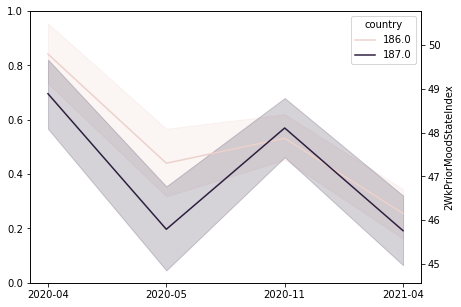

In [231]:
fig, ax1 = plt.subplots(figsize=(7,5))
ax2=ax1.twinx()
#sns.barplot(x='YearMonth', y='Value1', data=dataset, hue='Group',ax=ax1)
sns.lineplot(x='YearMonth',y='2WkPriorMoodStateIndex', data=combined_df, hue='country' )#marker='d',ax=ax2
plt.show()

In [232]:
df = combined_df[['2WkPriorMoodStateClass','YearMonth']]
# use groupby on df
dfg = combined_df.groupby(['YearMonth', 'country','2WkPriorMoodStateClass'])['ID'].count().reset_index()
dfg.head()

YearMonth  country 2WkPriorMoodStateClass   ID
0   2020-04    186.0     Extremely Stressed   99
1   2020-04    186.0    Moderately Stressed  510
2   2020-04    186.0                 Normal  659
3   2020-04    187.0     Extremely Stressed   68
4   2020-04    187.0    Moderately Stressed  371

<AxesSubplot:xlabel='YearMonth', ylabel='ID'>

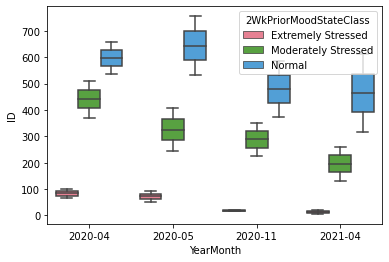

In [233]:
sns.boxplot(x="YearMonth", y="ID", hue="2WkPriorMoodStateClass", data=dfg, palette="husl")

- Covid Worry

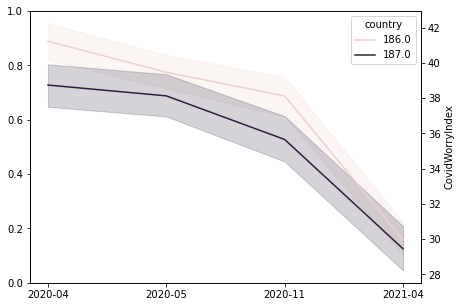

In [234]:
fig, ax1 = plt.subplots(figsize=(7,5))
ax2=ax1.twinx()
#sns.barplot(x='YearMonth', y='Value1', data=dataset, hue='Group',ax=ax1)
sns.lineplot(x='YearMonth',y='CovidWorryIndex', data=combined_df, hue='country' )#marker='d',ax=ax2
plt.show()

In [235]:
combined_df['CovidWorryIndex'].corr(combined_df['2WkPriorMoodStateIndex'])

0.4490827210969262

In [236]:
### Significant difference between Adult parents and Adults (who are not parents)

In [326]:
!pip install wordcloud

In [327]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [343]:
stop_words = list(STOPWORDS) + ["|", "time", "go", "will", "know","_na_", "lot","year"]

In [344]:
### APRIL 2020 text wordclouds

In [345]:
april_2020_data = pd.read_csv('updated_data\April\CRISIS_Parent_April_2020.csv')

In [346]:
april_2020_data.fillna("_NA_", inplace=True)

In [347]:
specifypositive_text = " | ".join(april_2020_data["specifypositive"].str.lower())

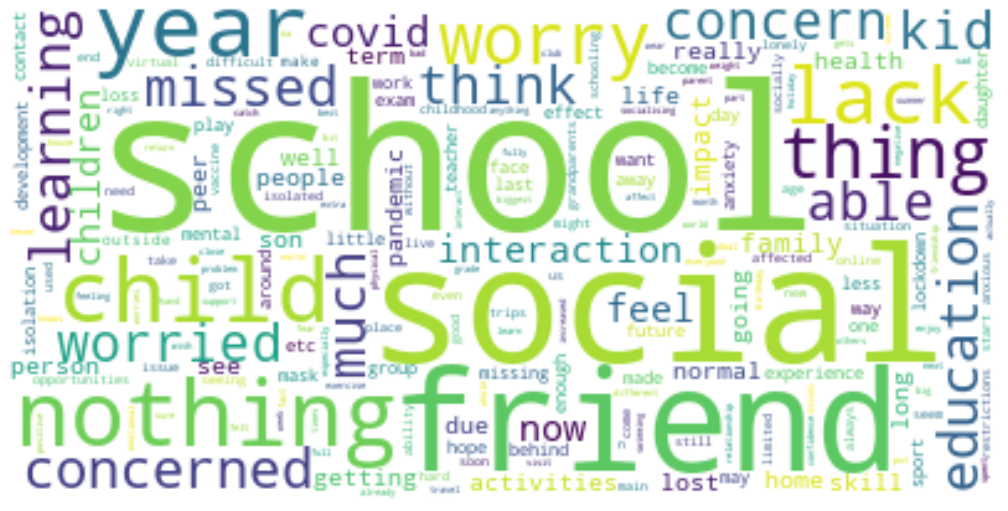

In [348]:
april_2020_data_wordcloud = WordCloud(collocations = False, background_color = 'white', stopwords=stop_words).generate(specifypositive_text)
# Display the generated Word Cloud
plt.figure(figsize=(16, 10), dpi=80)
plt.imshow(logger_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [349]:
anything_else_text = " | ".join(april_2020_data["anything_else"].str.lower())

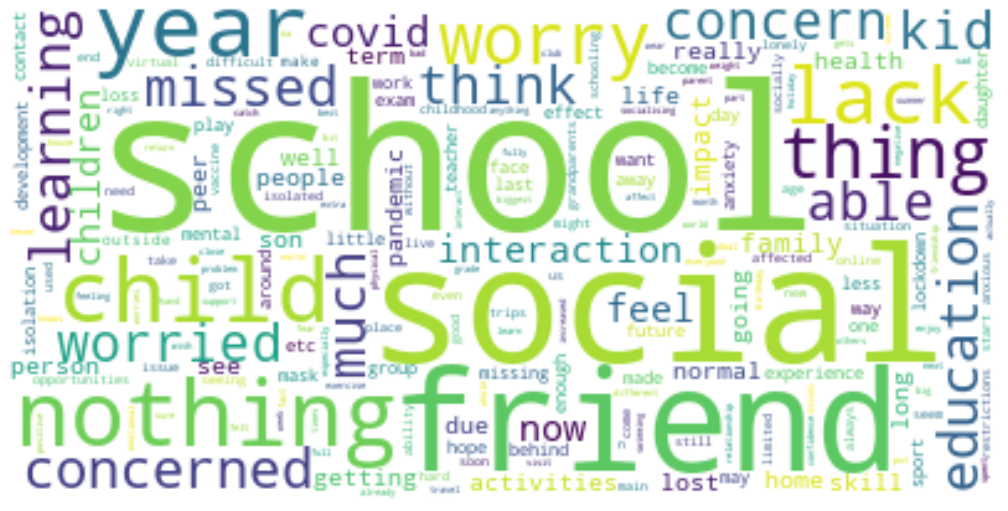

In [350]:
april_2020_data_wordcloud = WordCloud(collocations = False, background_color = 'white', stopwords=stop_words).generate(anything_else_text)
# Display the generated Word Cloud
plt.figure(figsize=(16, 10), dpi=80)
plt.imshow(logger_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
### May 2020 text wordclouds

In [351]:
may_2020_data = pd.read_csv('updated_data\May\CRISIS_Parent_May_2020.csv')

In [352]:
may_2020_data.fillna("_NA_", inplace=True)

In [353]:
specifypositive_text = " | ".join(may_2020_data["specifypositive"].str.lower())

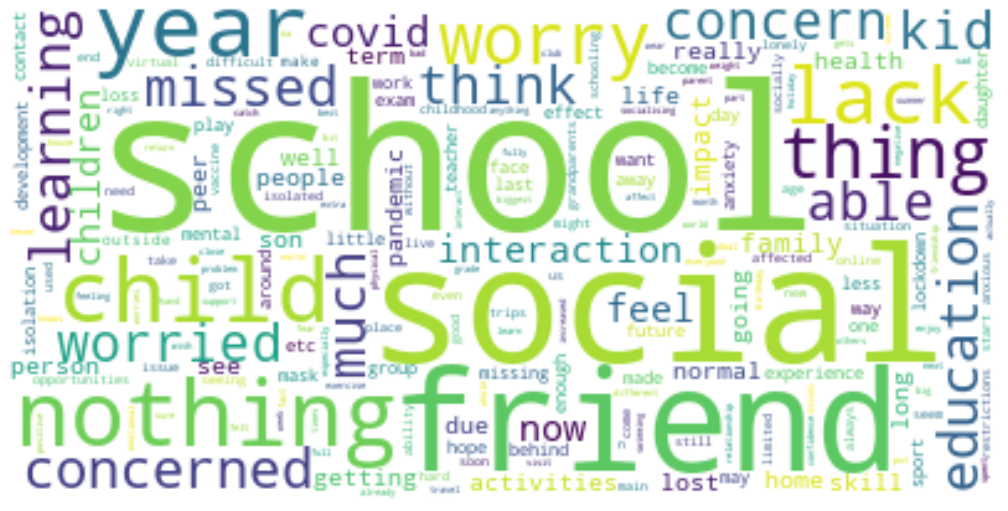

In [354]:
may_2020_data_wordcloud = WordCloud(collocations = False, background_color = 'white', stopwords=stop_words).generate(specifypositive_text)
# Display the generated Word Cloud
plt.figure(figsize=(16, 10), dpi=80)
plt.imshow(logger_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [324]:
### APRIL 2021 text wordclouds

In [364]:
logger_data = pd.read_csv('updated_data\April_21\CRISIS_Parent_April_2021.csv')

In [266]:
logger_data['vaccinelikelywhyparent'][0]

"Because it's important for people over 30 to get vaccinated"

In [267]:
logger_data['vaccinelikelywhyparent'][7]

'I already got one.'

In [269]:
logger_data['vaccinelikelywhyparent'][54]

'I have already had a first dose. I consider the benefit of vaccination greatly to outweigh the risks for people of my age.'

In [273]:
logger_data.fillna("_NA_", inplace=True)

In [325]:
vaccinelikelywhyparent_text = " | ".join(logger_data["vaccinelikelywhyparent"].str.lower())

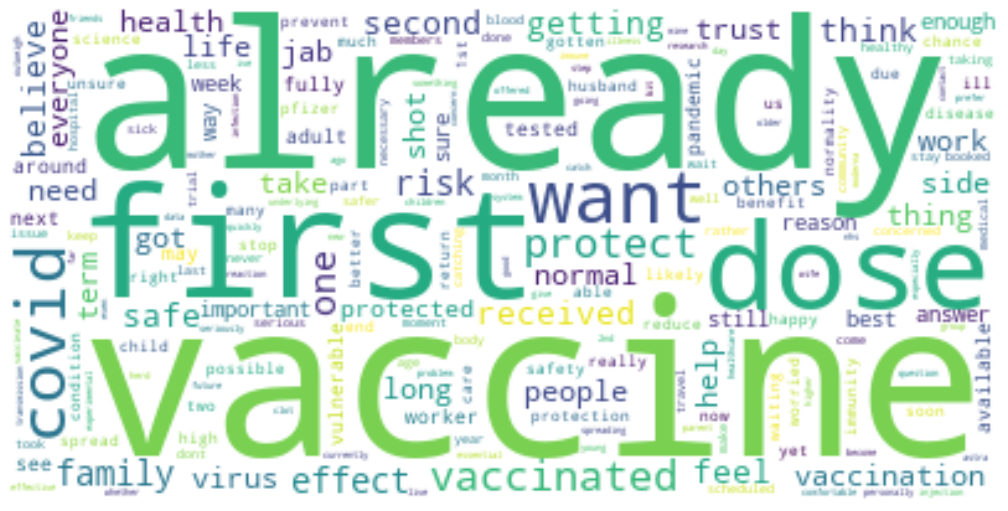

In [308]:
logger_wordcloud = WordCloud(collocations = False, background_color = 'white', stopwords=stop_words).generate(vaccinelikelywhyparent_text)
# Display the generated Word Cloud
plt.figure(figsize=(16, 10), dpi=80)
plt.imshow(logger_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [309]:
logger_data['vaccinelikelywhychild'][0]

"Because I'm not sure if it's recommended for children to have the vaccine"

In [310]:
vaccinelikelywhychild_text = " | ".join(logger_data["vaccinelikelywhychild"].str.lower())

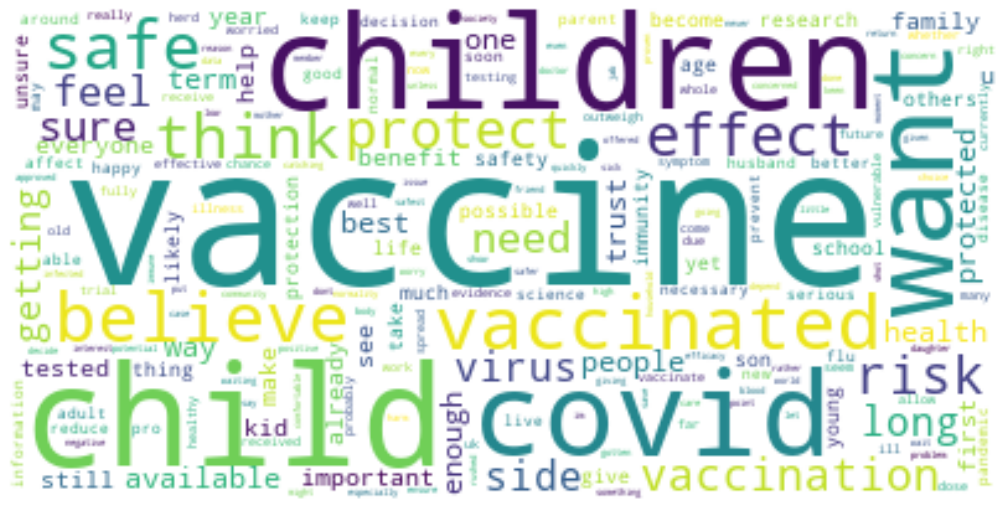

In [311]:
logger_wordcloud = WordCloud(collocations = False, background_color = 'white', stopwords=stop_words).generate(vaccinelikelywhychild_text)
# Display the generated Word Cloud
plt.figure(figsize=(16, 10), dpi=80)
plt.imshow(logger_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [312]:
logger_data['specifypositive'][6]

'recognises how important it is to have friends and family'

In [313]:
specifypositive_text = " | ".join(logger_data["specifypositive"].str.lower())

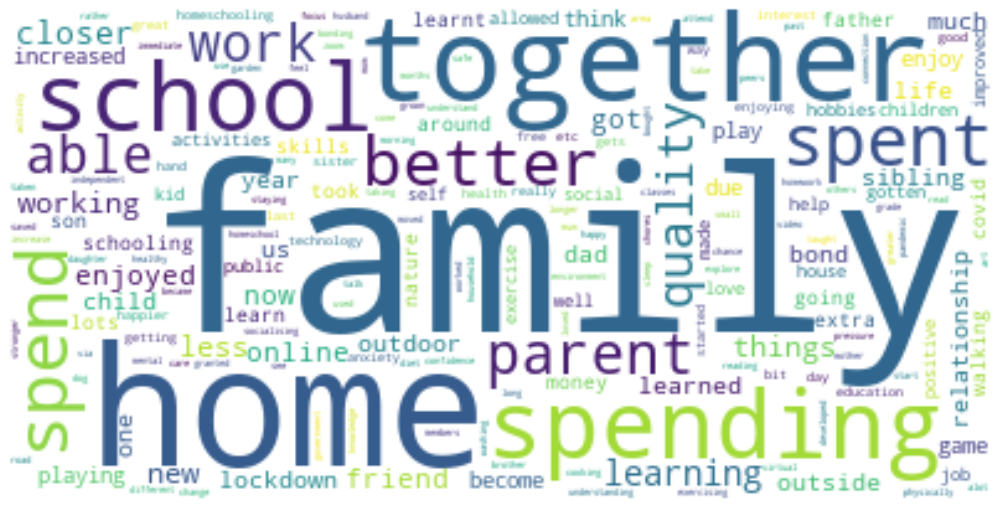

In [314]:
logger_wordcloud = WordCloud(collocations = False, background_color = 'white', stopwords=stop_words).generate(specifypositive_text)
# Display the generated Word Cloud
plt.figure(figsize=(16, 10), dpi=80)
plt.imshow(logger_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [315]:
logger_data['challenges'][6]

'yes my son hated it, said the internet was rubbish. We had to update our internet'

In [316]:
challenges_text = " | ".join(logger_data["challenges"].str.lower())

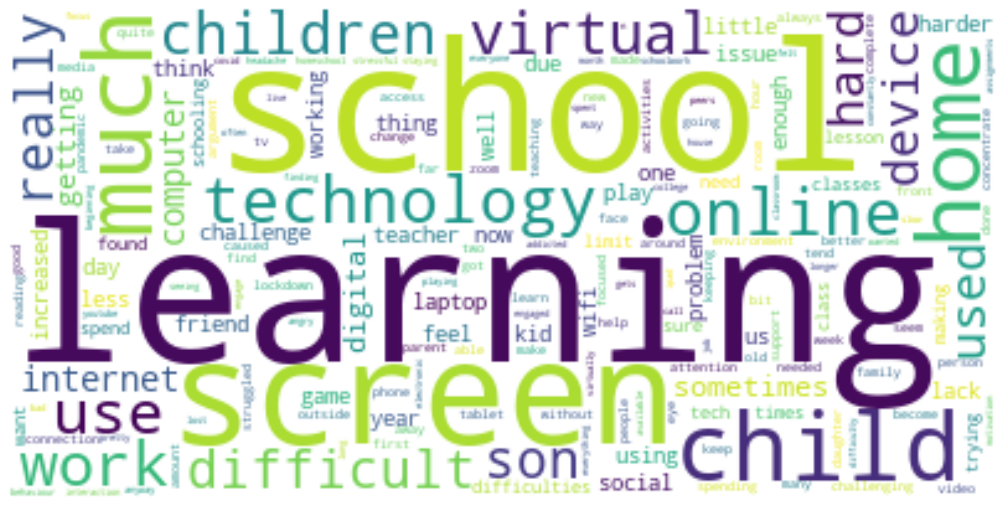

In [317]:
logger_wordcloud = WordCloud(collocations = False, background_color = 'white', stopwords=stop_words).generate(challenges_text)
# Display the generated Word Cloud
plt.figure(figsize=(16, 10), dpi=80)
plt.imshow(logger_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [318]:
logger_data['benefits'][8]

"The books and links are all organized in one place and it's easy to access additional information on courses when needed. "

In [319]:
benefits_text = " | ".join(logger_data["benefits"].str.lower())

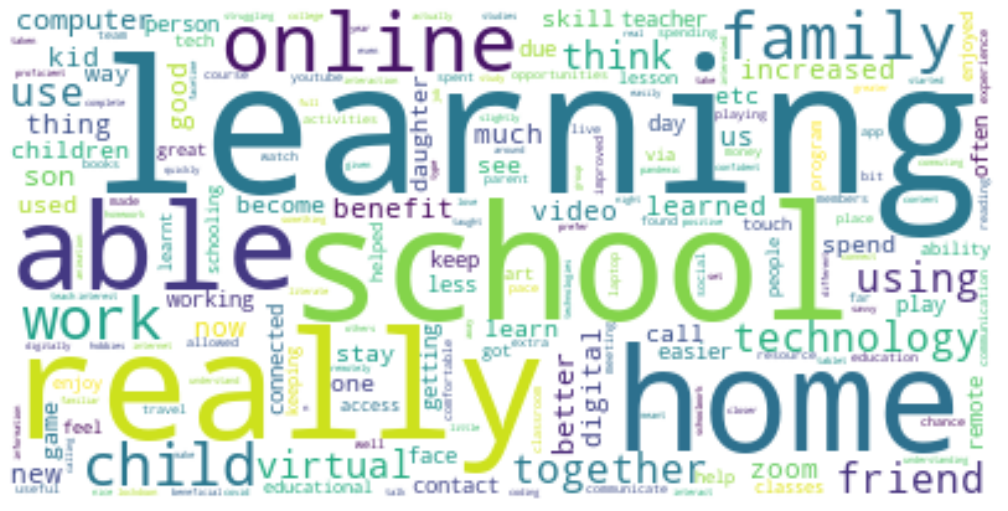

In [320]:
logger_wordcloud = WordCloud(collocations = False, background_color = 'white', stopwords=stop_words).generate(benefits_text)
# Display the generated Word Cloud
plt.figure(figsize=(16, 10), dpi=80)
plt.imshow(logger_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [321]:
logger_data['anything_else'][8]

'I worry about social development a little, that is all. '

In [322]:
anything_else_text = " | ".join(logger_data["anything_else"].str.lower())

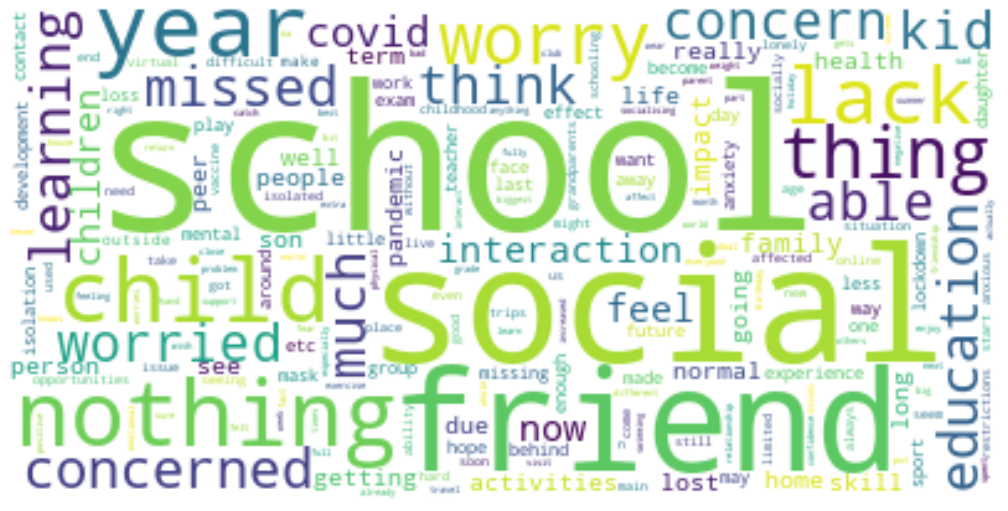

In [323]:
logger_wordcloud = WordCloud(collocations = False, background_color = 'white', stopwords=stop_words).generate(anything_else_text)
# Display the generated Word Cloud
plt.figure(figsize=(16, 10), dpi=80)
plt.imshow(logger_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Key Observations

In [ ]:
#1.Downward trend in Covid worry and emotions/mental stress from April 2020 to April 2021

#2.Covid worry and emotions/mental stress are positively correlated

#3.For Country=186, emotions/mental stress was overall less than Country=187

#4.For Country=186, covid worries was overall more than Country=187

#5.Top 5 factors that affected emotions and mental states:
#-In April 2020, 
#-In May 2020, 
#-In November 2020, 
#-In April 2021, 

#6.Positive Changes

#In April 2020 and May 2020 People are not positive in the staypositive context however worried about the school and how the social life of 
the children will be impacted.
#In April2021 people got more clarity on benefits and children were able to learn from online school and able to 
#spend more time with parents however social circle and firendship still a concern for the parents.
#In April 2021 also most of the people got first dose of vaccine however  parents are worried for children vaccine and also not sure about 
#is it safe for children without vaccine.

#7.Adults who are parent are more stressed based on childage